In [ ]:
import preprocessing
from preprocessing import final_preprocessing
import pandas as pd
import importlib
importlib.reload(preprocessing)

In [2]:
import pandas as pd
# load data
df = pd.read_csv("../data/combined_logs.csv")

In [3]:
df = final_preprocessing(df)

Dropping all unnecessary features...
Done.
Preprocessing timestamp...
Done.
Preprocessing status_code...
Done.
Preprocessing request_method...
Done.
Preprocessing bytes_sent...
Done.
Preprocessing referer...
Done.
Preprocessing requested_url...
Done.
Preprocessing user_agent...
Done.


In [4]:
print(df.head())

    remote_host                                      requested_url  \
0   47.76.35.19  [[-9.59417, 13.400708, -10.130259, -6.773663, ...   
1   47.76.35.19  [[-9.59417, 13.400708, -10.130259, -6.773663, ...   
2  40.77.167.53  [[-2.2412086, 5.747837, 1.3906591, -8.684399, ...   
3   47.76.35.19  [[-9.59417, 13.400708, -10.130259, -6.773663, ...   
4   47.76.35.19  [[-9.59417, 13.400708, -10.130259, -6.773663, ...   

   bytes_sent referer                                         user_agent  \
0    0.000099      []  [[0.5530458, 1.443417, 2.7351625, 5.059614, -3...   
1    0.000107      []  [[0.5530458, 1.443417, 2.7351625, 5.059614, -3...   
2    0.000051      []  [[0.5530458, 1.443417, 2.7351625, 5.059614, -3...   
3    0.000099      []  [[0.5530458, 1.443417, 2.7351625, 5.059614, -3...   
4    0.000107      []  [[0.5530458, 1.443417, 2.7351625, 5.059614, -3...   

   hour_sin  hour_cos  minute_sin  minute_cos  second_sin  ...  \
0       0.0       1.0         0.0         1.0    0.00000

In [13]:
condition = df['referer'].apply(lambda x: x == [])

df= df[~condition]
df = df.reset_index(drop=True)

In [16]:
print(len(df))

874945


In [23]:
print(df.head())

      remote_host                                      requested_url  \
0   89.247.174.98  [[-6.0340543, -7.0191703, 1.3655504, -5.902013...   
1  195.82.120.225  [[-6.0340543, -7.0191703, 1.3655504, -5.902013...   
2  195.82.120.225  [[-1.0974154, -4.6489835, 8.778011, 4.5213156,...   
3  195.82.120.225  [[1.713047, 3.18425, -1.9519207, 10.023354, -0...   
4  195.82.120.225  [[1.713047, 3.18425, -1.9519207, 10.023354, -0...   

   bytes_sent                                            referer  \
0    0.004639  [[5.132235, 0.71155745, 4.2633533, 2.0784423, ...   
1    0.000712  [[5.132235, 0.71155745, 4.2633533, 2.0784423, ...   
2    0.000006  [[5.132235, 0.71155745, 4.2633533, 2.0784423, ...   
3    0.000009  [[5.132235, 0.71155745, 4.2633533, 2.0784423, ...   
4    0.000112  [[5.132235, 0.71155745, 4.2633533, 2.0784423, ...   

                                          user_agent  hour_sin  hour_cos  \
0  [[0.5530458, 1.443417, 2.7351625, 5.059614, -3...       0.0       1.0   
1  [[0

In [27]:
print(df['referer'][0])

[array([ 5.132235  ,  0.71155745,  4.2633533 ,  2.0784423 , -2.6757677 ,
       -5.5702324 ,  3.3038523 , -0.7821631 ,  3.7703083 , -2.1762526 ,
       -3.7203074 ,  7.099562  , -0.7687016 ,  2.824247  , -1.105813  ,
       -0.97569376, -5.260026  ,  4.9135594 ,  2.5714474 , 10.565793  ,
        2.3149176 , -6.2639537 ,  1.30831   , -4.3544497 , -1.0097352 ,
        0.13396306, -1.2883018 ,  2.7192616 , -5.172053  ,  0.343872  ],
      dtype=float32), array([ 3.187297  ,  2.8912854 ,  3.8890674 ,  4.9076514 , -2.1448886 ,
       -3.3337853 ,  1.7103225 , -1.390089  ,  4.2278695 ,  0.2165592 ,
       -3.8484719 ,  8.821651  ,  1.7228333 ,  1.5839006 , -0.65311044,
       -1.1196253 , -3.614928  ,  5.528921  ,  3.0430412 , 12.3367    ,
        3.7562497 , -1.4569297 ,  4.3995275 , -5.4826784 , -2.5412958 ,
        1.1416723 , -0.4068054 ,  0.22423899, -3.54493   ,  2.202829  ],
      dtype=float32), array([-5.0336123 ,  0.13706066,  5.0666046 ,  1.1075315 , -1.4554582 ,
       -3.9245896

In [30]:
# Function to compute average vector
import numpy as np
def compute_average_vector(embedding_lists):
    num_dimensions = len(embedding_lists[0])
    average_vector = np.zeros(num_dimensions)
    for embedding in embedding_lists:
        average_vector += embedding
    average_vector /= len(embedding_lists)
    return average_vector.tolist()

In [31]:
df['referer'] = df['referer'].apply(compute_average_vector)

In [33]:
print(df['referer'].head())

0    [1.7541552186012268, 1.599033433943987, 4.5339...
1    [1.2645314931869507, 1.1232871040701866, 1.896...
2    [1.2645314931869507, 1.1232871040701866, 1.896...
3    [1.2645314931869507, 1.1232871040701866, 1.896...
4    [1.2645314931869507, 1.1232871040701866, 1.896...
Name: referer, dtype: object


In [40]:
def compute_average_vector2(embedding_lists):
    num_dimensions = len(embedding_lists[0])
    if not embedding_lists:
        return [0.0] * num_dimensions
    average_vector = np.zeros(num_dimensions)
    for embedding in embedding_lists:
        average_vector += embedding
    average_vector /= len(embedding_lists)
    return average_vector.tolist()

In [45]:
#df['user_agent'][0]

condition = df['user_agent'].apply(lambda x: x == [])

df= df[~condition]
df = df.reset_index(drop=True)

In [53]:
df['user_agent'] = df['user_agent'].apply(compute_average_vector2)

TypeError: object of type 'float' has no len()

In [56]:
print(df['user_agent'][1])
print(len(df))

[1.4150548370724374, 0.2330928925763477, 4.188664123415947, 1.249119303443215, -1.379327275536277, 0.4192112067883665, -0.38727731189944525, -1.8014527640559457, 4.365310801701113, -0.40979047458280216, 0.5322177616710012, 4.159318100322377, -1.9601362491957843, 0.6737357215447859, 2.74772430008108, 0.48903805965727026, 3.244177308949557, -0.8417661521922458, 0.6860386471856724, -1.6980528689243577, -0.4708764295686375, -2.926098053089597, -0.6670155284756963, -0.31987092711708764, -3.0732839588414538, -2.2805221343243662, -2.583327766169201, -0.05631245977499268, 5.335750395601446, -0.617499898780476]
874915


In [57]:
print(df.head())

      remote_host                                      requested_url  \
0   89.247.174.98  [[-6.0340543, -7.0191703, 1.3655504, -5.902013...   
1  195.82.120.225  [[-6.0340543, -7.0191703, 1.3655504, -5.902013...   
2  195.82.120.225  [[-1.0974154, -4.6489835, 8.778011, 4.5213156,...   
3  195.82.120.225  [[1.713047, 3.18425, -1.9519207, 10.023354, -0...   
4  195.82.120.225  [[1.713047, 3.18425, -1.9519207, 10.023354, -0...   

   bytes_sent                                            referer  \
0    0.004639  [1.7541552186012268, 1.599033433943987, 4.5339...   
1    0.000712  [1.2645314931869507, 1.1232871040701866, 1.896...   
2    0.000006  [1.2645314931869507, 1.1232871040701866, 1.896...   
3    0.000009  [1.2645314931869507, 1.1232871040701866, 1.896...   
4    0.000112  [1.2645314931869507, 1.1232871040701866, 1.896...   

                                          user_agent  hour_sin  hour_cos  \
0  [0.5310267499975256, -0.6133240477458851, 0.83...       0.0       1.0   
1  [1.

In [58]:
condition = df['requested_url'].apply(lambda x: x == [])

df= df[~condition]
df = df.reset_index(drop=True)

In [59]:
df['requested_url'] = df['requested_url'].apply(compute_average_vector)

In [60]:
print(df.head())

      remote_host                                      requested_url  \
0   89.247.174.98  [-0.5333794206380844, -4.285177105665207, -0.9...   
1  195.82.120.225  [1.6786304305900226, -1.8024127710271964, -0.3...   
2  195.82.120.225  [-1.1771655082702637, -0.5117125511169434, 1.8...   
3  195.82.120.225  [-0.8938116927941641, 0.9827700021366278, 0.64...   
4  195.82.120.225  [-2.1306546131769815, 0.509894385933876, -2.86...   

   bytes_sent                                            referer  \
0    0.004639  [1.7541552186012268, 1.599033433943987, 4.5339...   
1    0.000712  [1.2645314931869507, 1.1232871040701866, 1.896...   
2    0.000006  [1.2645314931869507, 1.1232871040701866, 1.896...   
3    0.000009  [1.2645314931869507, 1.1232871040701866, 1.896...   
4    0.000112  [1.2645314931869507, 1.1232871040701866, 1.896...   

                                          user_agent  hour_sin  hour_cos  \
0  [0.5310267499975256, -0.6133240477458851, 0.83...       0.0       1.0   
1  [1.

In [62]:
list_columns = ['requested_url', 'referer', 'user_agent']
for col in list_columns:
    series = pd.DataFrame(df[col].tolist())
    avg_values = series.mean(axis=1)
    df[col] = avg_values



In [64]:
print(df.head(10))

      remote_host  requested_url  bytes_sent   referer  user_agent  hour_sin  \
0   89.247.174.98      -1.273026    0.004639  0.643256    0.056526       0.0   
1  195.82.120.225      -1.121542    0.000712  0.168090    0.275528       0.0   
2  195.82.120.225       0.252106    0.000006  0.168090    0.275528       0.0   
3  195.82.120.225       0.398846    0.000009  0.168090    0.275528       0.0   
4  195.82.120.225      -0.463648    0.000112  0.168090    0.275528       0.0   
5  195.82.120.225      -0.730655    0.000518  0.168090    0.275528       0.0   
6  195.82.120.225      -0.755546    0.000309  0.168090    0.275528       0.0   
7  195.82.120.225      -0.551931    0.000190  0.168090    0.275528       0.0   
8  195.82.120.225      -1.082658    0.001159  0.168090    0.275528       0.0   
9  195.82.120.225       0.099139    0.000239  0.168090    0.275528       0.0   

   hour_cos  minute_sin  minute_cos  second_sin  ...  status_code_400  \
0       1.0    0.000000    1.000000    0.10452

In [87]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
grouped = df.groupby('remote_host')

In [88]:
remote_hosts_ordered = [remote_host for remote_host, _ in grouped]
print(remote_hosts_ordered)

['1.132.23.59', '1.144.22.173', '1.144.22.223', '1.147.74.213', '1.231.27.148', '100.19.147.246', '100.40.212.15', '101.115.196.182', '101.128.98.158', '101.183.44.136', '101.44.248.89', '101.44.249.100', '101.44.249.249', '101.44.249.41', '101.44.249.94', '101.44.250.113', '101.44.250.183', '101.44.250.191', '101.44.250.7', '101.57.0.57', '101.68.211.2', '102.109.159.3', '102.129.152.157', '102.152.222.7', '102.177.14.118', '102.222.133.149', '102.89.34.188', '102.96.200.209', '103.154.184.42', '103.167.217.137', '103.171.224.43', '103.186.66.231', '103.186.67.227', '103.188.244.181', '103.39.214.48', '103.43.136.1', '103.44.249.212', '103.5.0.237', '103.56.61.144', '103.80.108.132', '104.129.205.34', '104.155.43.79', '104.171.225.105', '104.175.160.190', '104.181.36.75', '104.187.98.142', '104.199.40.42', '104.230.18.87', '104.236.216.165', '104.247.115.41', '104.28.103.15', '104.28.114.10', '104.28.129.23', '104.28.130.138', '104.28.130.139', '104.28.131.97', '104.28.132.19', '104.2

In [68]:
max_timesteps = 20
sequences = []
for remote_host, group_data in grouped:
    # drop 'remote_host' column as it's no longer needed for individual sequences
    group_data = group_data.drop(columns=['remote_host'])
    
    # convert the DataFrame to numpy array
    sequence_array = group_data.to_numpy()
    
    # pad the sequence with zeros if it's shorter than max_timesteps
    padded_sequence = pad_sequences([sequence_array], maxlen=max_timesteps, dtype='float32', padding='post', truncating='post')
    
    # append the padded sequence to the list of sequences
    sequences.append(padded_sequence)

# stack all sequences to create the final input array for the LSTM
X = np.vstack(sequences)


In [70]:
print(X[0])

[[ 1.32676482e-01  1.84416022e-05  9.32806075e-01 -6.46765307e-02
   2.58819044e-01 -9.65925813e-01 -6.69130623e-01 -7.43144810e-01
   1.04528464e-01  9.94521916e-01  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-9.58529562e-02  6.32053241e-04  9.32806075e-01 -6.46765307e-02
   2.58819044e-01 -9.65925813e-01 -6.69130623e-01 -7.43144810e-01
   1.04528464e-01  9.94521916e-01  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-6.00874312e-02  2.96412018e-05  9.32806075e-01 -6.46765307e-02
   2.58819044e-01 -9.65925813e-01 -6.69130623e-01 -7.43144810e-01
   1.04528464e-01  9.94521916e-01  1.0

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_val = train_test_split(X, test_size=0.2, random_state=42)

In [78]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

# X is input data
input_shape = X.shape[1:] # get shape of input data

model = Sequential([
    LSTM(100, activation='relu', input_shape=input_shape, return_sequences=True),
    LSTM(100, activation='relu', return_sequences=True),
    TimeDistributed(Dense(input_shape[-1])) # reconstruct input
])

model.compile(optimizer='adam', loss='mse')

In [79]:
history = model.fit(X_train, X_train, epochs=100, batch_size=32, validation_data=(X_val, X_val))

Epoch 1/100
241/241 [==============================] - 51s 198ms/step - loss: 0.0269 - val_loss: 0.0056
Epoch 2/100
241/241 [==============================] - 45s 189ms/step - loss: 0.0024 - val_loss: 0.0011
Epoch 3/100
241/241 [==============================] - 39s 162ms/step - loss: 7.5856e-04 - val_loss: 4.9798e-04
Epoch 4/100
241/241 [==============================] - 47s 196ms/step - loss: 4.4869e-04 - val_loss: 3.6655e-04
Epoch 5/100
241/241 [==============================] - 42s 175ms/step - loss: 2.5461e-04 - val_loss: 2.0680e-04
Epoch 6/100
241/241 [==============================] - 38s 157ms/step - loss: 2.0745e-04 - val_loss: 1.7290e-04
Epoch 7/100
241/241 [==============================] - 47s 194ms/step - loss: 1.4917e-04 - val_loss: 1.6812e-04
Epoch 8/100
241/241 [==============================] - 49s 204ms/step - loss: 1.6162e-04 - val_loss: 1.1407e-04
Epoch 9/100
241/241 [==============================] - 47s 196ms/step - loss: 1.0273e-04 - val_loss: 1.2525e-04
Epoch 10

In [80]:
val_loss = model.evaluate(X_val, X_val)
print(f"Validation Loss: {val_loss}")

61/61 [==============================] - 1s 19ms/step - loss: 2.5953e-05
Validation Loss: 2.5953113436116837e-05


So, threshold is set to a value such that only 0.1% of the data (the top 0.1% in terms of reconstruction error) exceeds this threshold. This threshold is used to identify outliers or anomalies in the data. Data points with reconstruction errors higher than this threshold are considered anomalies or exceptions.

In [104]:
# predict the reconstruction of the input for each sequence
reconstructions = model.predict(X)

# calculate the reconstruction error for each sequence
reconstruction_error = np.mean(np.square(X - reconstructions), axis=(1, 2))

# set a threshold for anomaly detection
threshold = np.percentile(reconstruction_error, 99.9) # we're looking for exceptions

# identify anomalies
anomalies = reconstruction_error > threshold

301/301 [==============================] - 6s 19ms/step


In [105]:
anomalous_remote_hosts = [remote_hosts_ordered[i] for i, is_anomaly in enumerate(anomalies) if is_anomaly]

In [106]:
print("Anomalous remote hosts:", anomalous_remote_hosts)

Anomalous remote hosts: ['128.90.90.159', '139.47.117.125', '191.101.41.33', '217.76.150.91', '35.145.4.24', '46.6.247.137', '79.154.15.200', '80.102.191.11', '83.40.230.245', '91.92.249.130']


In [107]:
remote_host_errors = {remote_host: error for remote_host, error in zip(remote_hosts_ordered, reconstruction_error)}

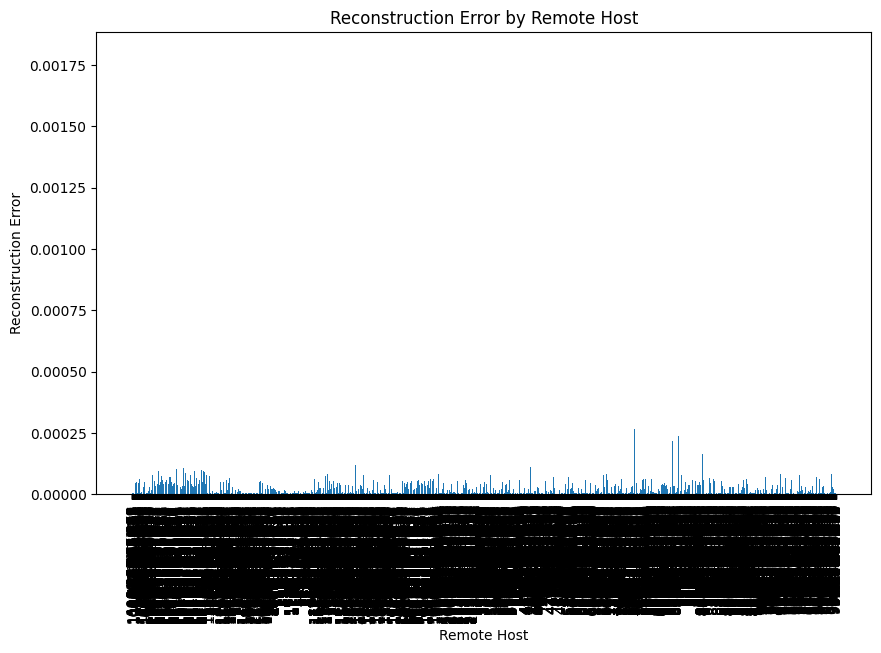

In [108]:
import matplotlib.pyplot as plt

# extract remote_host identifiers and their corresponding errors
remote_host_ids = list(remote_host_errors.keys())
errors = list(remote_host_errors.values())

# create a bar plot of the reconstruction errors
plt.figure(figsize=(10, 6))
plt.bar(remote_host_ids, errors)
plt.xlabel('Remote Host')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error by Remote Host')
plt.xticks(rotation=90) # rotate x-axis labels for better readability
plt.show()